In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("../data/hourly_count/processed/pivoted.csv", index_col=0)

In [3]:
X = df[[f"hour_ratio_{str(i).zfill(2)}" for i in range(24)]].values

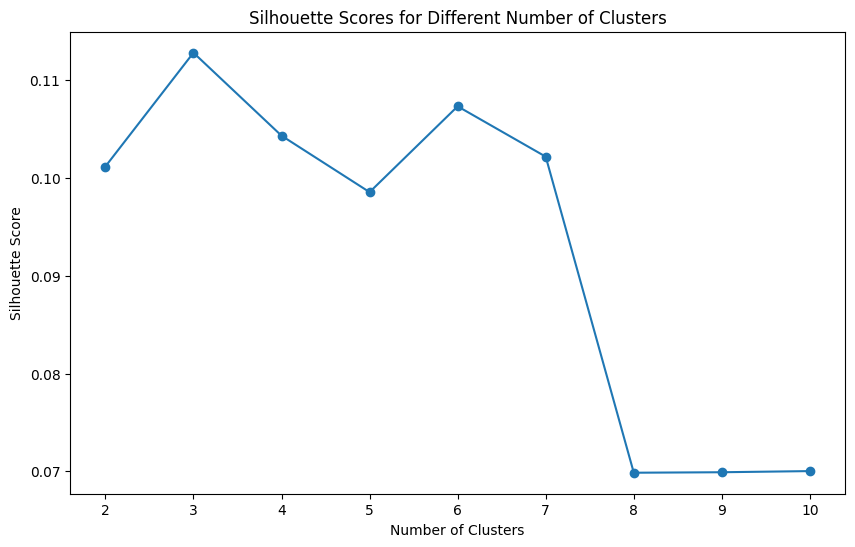

The optimal number of clusters is 3


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Sample data: replace this with your dataset
# X = your_data

# Function to compute silhouette score for different number of clusters
def find_optimal_clusters(X, max_clusters):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Number of Clusters')
    plt.show()

    # Finding the number of clusters with the maximum silhouette score
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters, silhouette_scores

# Assuming X is your data array
# max_clusters is the maximum number of clusters to evaluate
optimal_clusters, silhouette_scores = find_optimal_clusters(X, max_clusters=10)

print(f"The optimal number of clusters is {optimal_clusters}")


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data: replace this with your dataset
# X = your_data

# Create directory if it doesn't exist
output_dir = "./report"
os.makedirs(output_dir, exist_ok=True)

# Perform KMeans clustering with the optimal number of clusters
optimal_clusters = 6  # Replace with the optimal number of clusters you found earlier
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the mean and standard deviation for each cluster
means = []
stds = []
for i in range(optimal_clusters):
    cluster_data = X[cluster_labels == i]
    means.append(np.mean(cluster_data, axis=0))
    stds.append(np.std(cluster_data, axis=0))

means = np.array(means)
stds = np.array(stds)

# Plotting a separate bar graph for each cluster with shaded areas for variation
features = [str(i) for i in range(X.shape[1])]  # Label features as '1', '2', '3', ...

for i in range(optimal_clusters):
    plt.figure(figsize=(10, 6))
    plt.bar(features, means[i], color='skyblue', alpha=0.6, label='Mean Value')

    # Shaded area for variation (mean ± std)
    plt.fill_between(
        np.arange(len(features)),
        means[i] - stds[i],
        means[i] + stds[i],
        color='skyblue',
        alpha=0.2,
        label='Mean ± Std Dev'
    )

    plt.xlabel('Feature')
    plt.ylabel('Mean Value')
    plt.title(f'Cluster {i}: Mean and Variation of Features')
    plt.ylim(0, 1)  # Assuming data is in the range 0-1
    plt.legend()

    # Save the plot to the specified directory
    plt.savefig(os.path.join(output_dir, f'nc{optimal_clusters}_cluster_{i}_mean_variation.png'))
    plt.close()  # Close the plot to avoid display

print(f"Plots saved in: {output_dir}")


Plots saved in: ./report
